## 1D Convnets as an alternative to RNNs for sequence processing

- 1D convnets can be competitive with RNNs on certain sequence processing problems, usually at a considerably cheaper computational cost. 

## 1. Build a simple 2-layer 1D convnet and apply it to the IMDB sentiment classification task.

Pad sequences (samples x time)
x_train shape: (25000, 500)
x_test shape: (25000, 500)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_3 (Conv1D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d_1               │ ?                           │               0 │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 14s 81ms/step - acc: 0.5032 - loss: 0.8657 - val_acc: 0.5306 - val_loss: 0.6899
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 13s 81ms/step - acc: 0.5932 - loss: 0.6798 - val_acc: 0.6208 - val_loss: 0.6755
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 13s 80ms/step - acc: 0.6838 - loss: 0.6551 - val_acc: 0.6642 - val_loss: 0.6509
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 13s 80ms/step - acc: 0.7485 - loss: 0.6085 - val_acc: 0.7548 - val_loss: 0.5844
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 13s 81ms/step - acc: 0.7965 - loss: 0.5144 - val_acc: 0.8040 - val_loss: 0.4771
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 13s 81ms/step - acc: 0.8355 - loss: 0.4247 - val_acc: 0.8258 - val_loss: 0.4321
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 13s 83ms/step - acc: 0.8614 - loss: 0.3786 - val_acc: 0.8446 - val_loss: 0.4192
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 13s 81ms/step - acc: 0.8754 - loss: 0.3446 - val_acc: 0.8546 - val_loss: 0.4363
Epoch 9/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 

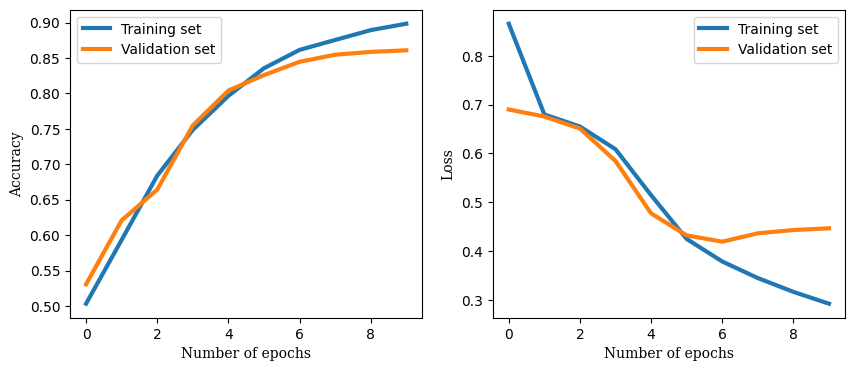

In [2]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000  # number of words to consider as features
max_len = 500  # cut texts after this number of words (among top max_features most common words)
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_test = sequence.pad_sequences(x_test, maxlen=max_len)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.Embedding(max_features, 128))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.MaxPooling1D(5))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1))
model.summary()
model.compile(optimizer=RMSprop(learning_rate=1e-4), loss='binary_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

def plot_fig(history):
    import matplotlib.pyplot as plt
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.plot(range(len(history.history['acc'])),history.history['acc'],linewidth=3, label='Training set')
    plt.plot(range(len(history.history['acc'])),history.history['val_acc'],linewidth=3, label='Validation set')
    plt.xlabel("Number of epochs",fontdict= {'family':'serif','size':10})
    plt.ylabel("Accuracy",fontdict= {'family':'serif','size':10})
    plt.legend()
    plt.subplot(1,2,2)
    plt.plot(range(len(history.history['acc'])),history.history['loss'],linewidth=3, label='Training set')
    plt.plot(range(len(history.history['acc'])),history.history['val_loss'],linewidth=3, label='Validation set')
    plt.xlabel("Number of epochs",fontdict= {'family':'serif','size':10})
    plt.ylabel("Loss",fontdict= {'family':'serif','size':10})
    plt.legend()
    plt.show()
plot_fig(history)

- Here are our training and validation results: validation accuracy is somewhat lower than that of the LSTM we tried before, but runtime is faster, both on CPU and GPU (albeit the exact speedup will vary greatly depending on your exact configuration).

## 2. Combining CNNs and RNNs to process long sequences.

- Because 1D convnets process input patches independently, they are not sensitive to the
order of the timesteps (beyond a local scale, the size of the convolution windows), unlike
RNNs. Of course, in order to be able to recognize longer-term patterns, one could stack
many convolution layers and pooling layers, resulting in upper layers that would "see"
long chunks of the original inputs—but that’s still a fairly weak way to induce
order-sensitivity.
- One strategy to combine the speed and lightness of convnets with the order-sensitivity
of RNNs is to use a 1D convnet as a preprocessing step before a RNN. This is especially
beneficial when dealing with sequences that are so long that they couldn’t realistically be
processed with RNNs, e.g. sequences with thousands of steps. The convnet will turn the long input sequence into much shorter (downsampled) sequences of higher-level features. This sequence of extracted features then becomes the input to the RNN part of the network.

In [3]:
import chardet
with open(r'F:\learning\Deep Learning\ch06\mpi_roof_2022a\mpi_roof_2022a.csv', 'rb') as f:
    data = f.read(200000)
result = chardet.detect(data)
import pandas as pd
df1=pd.read_csv(r'F:\learning\Deep Learning\ch06\mpi_roof_2022a\mpi_roof_2020a.csv', encoding=result['encoding'])
df2=pd.read_csv(r'F:\learning\Deep Learning\ch06\mpi_roof_2022a\mpi_roof_2020b.csv', encoding=result['encoding'])
df3=pd.read_csv(r'F:\learning\Deep Learning\ch06\mpi_roof_2022a\mpi_roof_2021a.csv', encoding=result['encoding'])
df4=pd.read_csv(r'F:\learning\Deep Learning\ch06\mpi_roof_2022a\mpi_roof_2021b.csv', encoding=result['encoding'])
df5=pd.read_csv(r'F:\learning\Deep Learning\ch06\mpi_roof_2022a\mpi_roof_2022a.csv', encoding=result['encoding'])
df6=pd.read_csv(r'F:\learning\Deep Learning\ch06\mpi_roof_2022a\mpi_roof_2022b.csv', encoding=result['encoding'])
df7=pd.read_csv(r'F:\learning\Deep Learning\ch06\mpi_roof_2022a\mpi_roof_2023a.csv', encoding=result['encoding'])
df8=pd.read_csv(r'F:\learning\Deep Learning\ch06\mpi_roof_2022a\mpi_roof_2023b.csv', encoding=result['encoding'])
df9=pd.read_csv(r'F:\learning\Deep Learning\ch06\mpi_roof_2022a\mpi_roof_2024.csv', encoding=result['encoding'])
df=pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9])
del df1, df2, df3, df4, df5, df6, df7,df8, df9, result, f, data

# Normalizing the data
float_data=df.iloc[:,1:].values
mean=float_data[:100000,:].mean(axis=0)
float_data-=mean
std=float_data[:100000,:].std(axis=0)
float_data/=std

In [4]:
import numpy as np
def generator(data, lookback, delay, min_index, max_index, shuffle=False, batch_size=128, step=6):
    if max_index is None:
        max_index = len(data) - delay - 1
    i = min_index + lookback
    while 1:
        if shuffle:
            rows = np.random.randint(min_index + lookback, max_index, size=batch_size)
        else:
            if i + batch_size >= max_index:
                i = min_index + lookback
            rows = np.arange(i, min(i + batch_size, max_index))
            i += len(rows)

        samples = np.zeros((len(rows),
                           lookback // step,
                           data.shape[-1]))
        targets = np.zeros((len(rows),))
        for j, row in enumerate(rows):
            indices = range(rows[j] - lookback, rows[j], step)
            samples[j] = data[indices]
            targets[j] = data[rows[j] + delay][1]
        yield samples, targets

lookback = 720
step = 3
delay = 144
batch_size = 128

train_gen = generator(float_data, lookback=lookback, delay=delay, min_index=0, max_index=100000, shuffle=True, step=step,  batch_size=batch_size)
val_gen = generator(float_data, lookback=lookback, delay=delay, min_index=100001, max_index=200000, step=step, batch_size=batch_size)
test_gen = generator(float_data, lookback=lookback, delay=delay, min_index=200001, max_index=None, step=step, batch_size=batch_size)

In [5]:
# This is how many steps to draw from `val_gen`
# in order to see the whole validation set:
val_steps = (200000 - 100001 - lookback) // batch_size

# This is how many steps to draw from `test_gen`
# in order to see the whole test set:
test_steps = (len(float_data) - 200001 - lookback) // batch_size

C:\Users\li\anaconda3\envs\LLM\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_4 (Conv1D)                    │ (None, None, 32)            │           3,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_2 (MaxPooling1D)       │ (None, None, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_5 (Conv1D)                    │ (None, None, 32)            │           5,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru (GRU)                            │ (None, 32)                  │           6,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,913 (58.25 KB)

 Trainable params: 14,913 (58.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 29s 52ms/step - loss: 0.3497 - val_loss: 0.3418
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 24s 49ms/step - loss: 0.3147 - val_loss: 0.3406
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 24s 48ms/step - loss: 0.2992 - val_loss: 0.3394
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 24s 48ms/step - loss: 0.2859 - val_loss: 0.3458
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 24s 48ms/step - loss: 0.2732 - val_loss: 0.3454
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 24s 49ms/step - loss: 0.2631 - val_loss: 0.3422
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 24s 48ms/step - loss: 0.2522 - val_loss: 0.3499
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 25s 51ms/step - loss: 0.2438 - val_loss: 0.3531
Epoch 9/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 25s 49ms/step - loss: 0.2346 - val_loss: 0.3434
Epoch 10/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 24s 47ms/step - loss: 0.2281 - val_loss: 0.3498


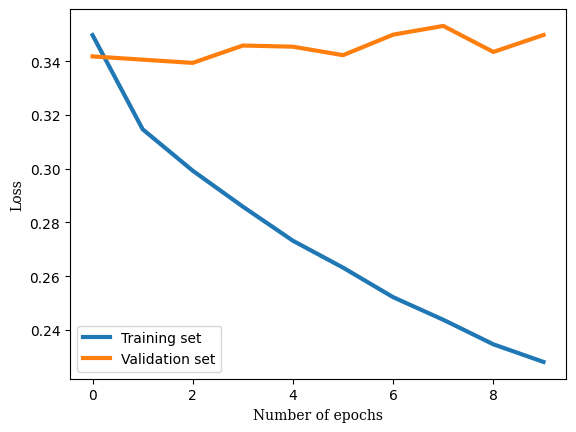

In [6]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt
model = Sequential()
model.add(layers.Conv1D(32, 5, activation='relu', input_shape=(None, float_data.shape[-1])))
model.add(layers.MaxPooling1D(3))
model.add(layers.Conv1D(32, 5, activation='relu'))
model.add(layers.GRU(32, dropout=0.1, recurrent_dropout=0.5))
model.add(layers.Dense(1))
model.summary()
model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit(train_gen,
                              steps_per_epoch=500,
                              epochs=10,
                              validation_data=val_gen,
                              validation_steps=val_steps)
def plot_fig(history):   
    #plt.figure(figsize=(10,4))
    plt.plot(range(len(history.history['loss'])),history.history['loss'],linewidth=3, label='Training set')
    plt.plot(range(len(history.history['loss'])),history.history['val_loss'],linewidth=3, label='Validation set')
    plt.xlabel("Number of epochs",fontdict= {'family':'serif','size':10})
    plt.ylabel("Loss",fontdict= {'family':'serif','size':10})
    plt.legend()
    plt.show()
plot_fig(history)

- Judging from the validation loss, this setup is not quite as good as the regularized GRU alone, but it’s significantly faster. It is looking at twice more data, which in this case doesn’t appear to be hugely helpful, but may be important for other datasets.